### (0 баллов) Считываем данные

In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [134]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [135]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [136]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [137]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [139]:
X, y = load_boston(return_X_y=True)

In [140]:
dataset.filename

'C:\\Users\\alina\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [144]:
X = np.append(X, np.ones(506).reshape(506, 1), axis=1)

In [145]:
df = pd.DataFrame(columns=dataset.feature_names, data=dataset.data)
df['target'] = dataset.target

In [146]:
df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [147]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


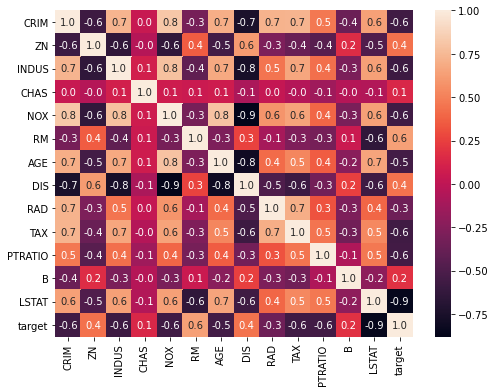

In [149]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".1f");


Видим что наша целевая переменная таргет коррелирует с RM, еще есть обратная корреляция с LSTAT
Значит есть смысл рассматривать линейные модели + данных не так много

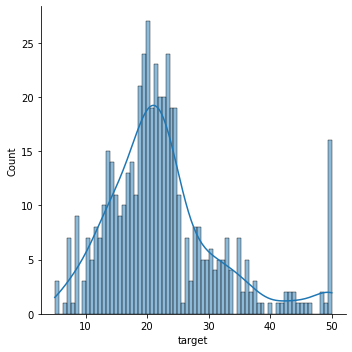

In [155]:
sns.displot(df.target, bins=70, kde=True)

Видим, что наша целевая переменная распределена не нормально, попробуем прологарифмировать и посмотреть как изменится распределение

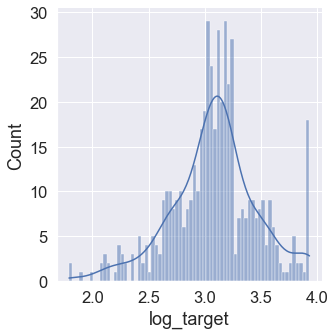

In [206]:
df = df.assign(log_target=np.log(df.target + 1))
sns.displot(df.log_target, bins=70, kde=True)


### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Нормализуем наши данные

In [175]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [176]:
X_train_norm, X_test_norm

(array([[-0.41694218,  0.34451337, -1.11796605, ..., -1.10817559,
          0.        ,  0.        ],
        [-0.2800016 , -0.49972297, -0.42106823, ...,  0.86323731,
          0.        ,  0.        ],
        [-0.40809056, -0.49972297, -0.36021645, ..., -0.67845501,
          0.        ,  0.        ],
        ...,
        [-0.41946696,  2.87722238, -1.30921451, ..., -0.91284805,
          0.        ,  0.        ],
        [ 0.85728607, -0.49972297,  1.02198836, ...,  1.4980518 ,
          0.        ,  0.        ],
        [-0.39498096, -0.49972297, -0.36021645, ..., -0.2654768 ,
          0.        ,  0.        ]]),
 array([[-4.10672618e-01, -4.99722970e-01, -1.01364870e+00,
         -2.70394541e-01, -3.85566962e-01,  1.64534725e-01,
          5.62730959e-01, -5.44939832e-01, -5.23106266e-01,
         -6.67465696e-01, -8.27740625e-01,  4.33392691e-01,
         -4.87313067e-01,  0.00000000e+00,  0.00000000e+00],
        [-4.14720969e-01,  1.18874970e+00, -6.71719630e-01,
          3.

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [177]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_norm, y_train)
y_pred = reg.predict(X_test_norm)

In [178]:
reg.coef_ #добавить столбик 1?

array([-1.04654473,  0.94555203,  0.1469705 ,  0.69938666, -2.17047122,
        2.66099601,  0.1287188 , -3.18488678,  2.7058487 , -1.98050984,
       -2.08118122,  0.96228308, -3.94278647,  0.        ,  0.        ])

In [196]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(reg, X_test_norm, y_test, n_repeats=15)

perm_df = pd.DataFrame((perm['importances_mean'], dataset.feature_names),
                       index=('Score', 'Features'))
perm_df = perm_df.T
perm_df = perm_df.sort_values(ascending=False, by='Score')

In [197]:
perm_df[:10]

,Score,Features
12,0.301579,LSTAT
8,0.267498,RAD
7,0.145086,DIS
5,0.112592,RM
10,0.104775,PTRATIO
9,0.095015,TAX
4,0.077219,NOX
1,0.034783,ZN
3,0.006844,CHAS
2,0.001768,INDUS


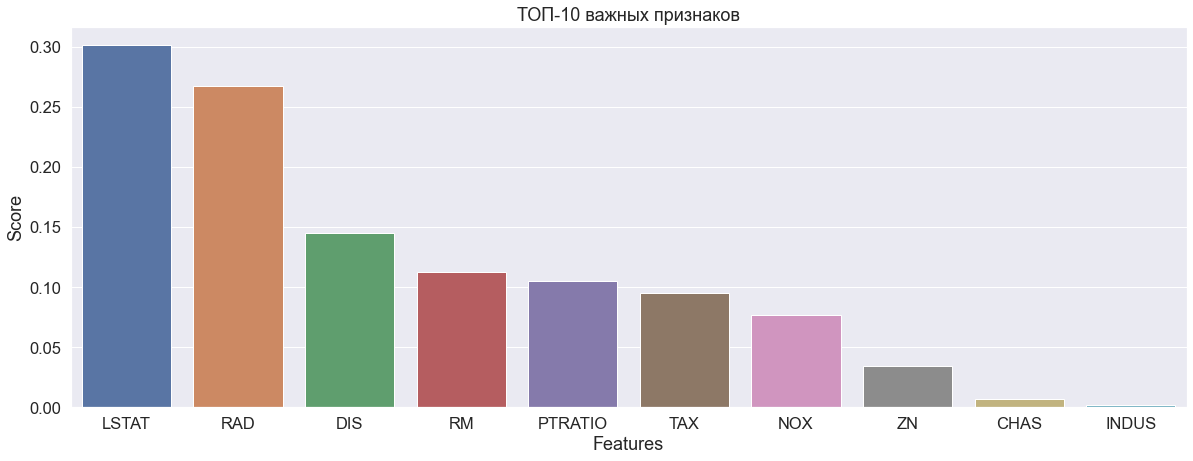

In [198]:
plt.figure(figsize=(20, 7))

sns.set(font_scale=1.5)
sns.barplot(x="Features", y="Score", data=perm_df[:10])
plt.title('ТОП-10 важных признаков')

plt.show()

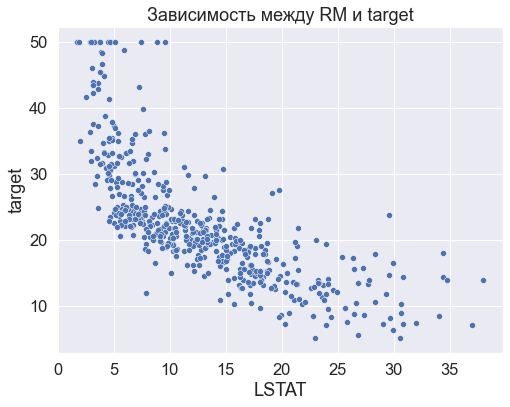

In [200]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='LSTAT', y='target', data=df)
plt.title('Зависимость между LSTAT и target')
plt.show()

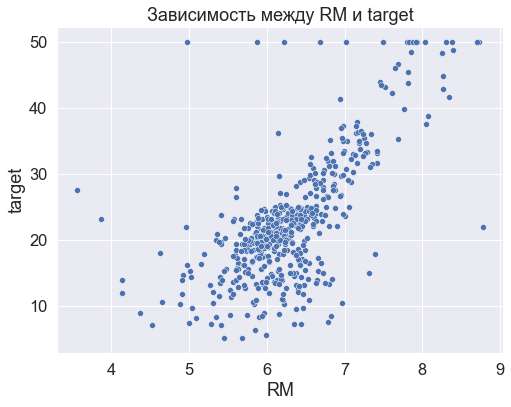

In [211]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='RM', y='target', data=df)
plt.title('Зависимость между RM и target')
plt.show()

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def MSE(y_real, y_pred):
    return np.square(y_real-y_pred).mean()

In [180]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

RMSE: 3.8724479178657325
MAE: 2.8342104578589575


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [188]:
MSE(y_test, y_train.mean())
tmp = y_train.mean()
l = [tmp] *51
np.sqrt(mean_squared_error(y_test, l))

8.062755503617616

In [189]:
from sklearn.metrics import r2_score


r2_score(y_test, y_pred)

0.7598135533532474

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.


Оптимальная lambda:
Lambda=150.20, результат=29.75


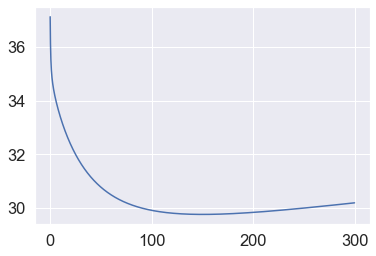

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge


lambdas = np.arange(0.0, 300.0, 0.1)
lambda_errors = []

for i in lambdas:
    reg = Ridge(alpha=i)
    lambda_errors.append((i, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))))
    #print(i, np.mean(-cross_val_score(reg, X_train_norm, y_train, cv=5, scoring='neg_mean_squared_error')))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_train_error))

f = [x[0] for x in lambda_errors]
s = [x[1] for x in lambda_errors]

plt.plot(f, s)

In [209]:
# L2
reg = Ridge(alpha = 150.20).fit(X_train_norm, y_train)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))

errors = -cross_val_score(Ridge(),  X_train_norm, y_train, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг = 22.694505494505513
Результат=24.340648510246144


In [212]:
regRid = Ridge(alpha = 150.20)
regRid.fit(X_train_norm, y_train)
y_pred = regRid.predict(X_test_norm)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

print(r2_score(y_test, y_pred))

RMSE: 3.8578133617188235
MAE: 2.8648387651666427
0.7616255235686114


Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Как мы видим регуляризация почти не улучшает нашу модель. Лучшее альфа которое мы можем выбрать для L2 регуляризации - 150, средняя ошибка при этом  - 24. 

В данной задаче можно использовать обычную линейную регрессию